# Premier contact avec une API
## Libraries & functions

In [140]:
import requests
from PIL import Image
from io import BytesIO
import os

## Exercice 1
1. En utilisant la bibliothèque `requests`, faire une requête `get` sur l'url https://jsonplaceholder.typicode.com/posts\
    a. Stockez le résultat de cette requête dans une variable\
    b. Explorez l'objet stocké dans cette variable
2. Que signifie le code "status" ?
3. Dans quel attribut trouve-t-on des données ?

In [2]:
res = requests.get("https://jsonplaceholder.typicode.com/posts")

In [3]:
print(f"status_code: {res.status_code}")

status_code: 200


Le `status_code` indique si la requête HTTP a été réussie ou non [(source)](https://developer.mozilla.org/en-US/docs/Web/HTTP/Reference/Status):

- Informational responses (100 – 199)
- Successful responses (200 – 299)
- Redirection messages (300 – 399)
- Client error responses (400 – 499)
- Server error responses (500 – 599)




In [4]:
content = res.json()
content[0]

{'userId': 1,
 'id': 1,
 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}

## Exercice 2
A l'aide de l'API et de la bibliothèque `requests`, écrire pour chaque exercice une fonction en python qui :
1. Récupère une image aléatoire de chat ou de chien
2. Récupère 5 images aléatoires
3. Récupère 3 images aléatoires de type GIF uniquement
4. Récupère la liste complète des races de chats ou de chiens
5. Récupère 3 images de la race "bengal"
6. Envoie un vote positif pour une image de chat ou de chien
7. Supprime le vote que tu viens de créer
8. Fais une requête volontairement incorrecte
9. (Bonus) Envoie une image personnalisée de ton chat ou de ton chien

In [ ]:
class CatProcessor:
    def __init__(self):
        self.api_key = 'live_XMw4Jxwq8bZFjyOAAIId4Ayi8uKi2iBk3snIjxVZHrj3ZY4fdQQQGmdTHqdm5gc5'
        self.headers = {"x-api-key": self.api_key}

    def show_n_random_cats(self, n, extension=None, breed_id=None):
        urls = self.get_random_cat_urls(n, extension, breed_id)
        for url in urls:
            self.show_image(url)

    def get_random_cat_urls(self, n, extension=None, breed_id=None):

        # Base URL
        url = f"https://api.thecatapi.com/v1/images/search?limit={n}&api_key={self.api_key}"

        # Request specific extension
        if extension in ["jpg", "png", "gif"]:
            url = f"{url}&mime_types={extension}"
        elif extension is not None:
            raise ValueError(f"Extension must be either None, 'jpg', 'png' or 'gif', was given '{extension}' instead.")
        
        # Request specific breed
        if breed_id in self.get_all_breeds():
            url = f"{url}&breed_ids={breed_id}"
        elif breed_id is not None:
            raise ValueError(f"Incorrect breed ID ('{breed_id}').")
        
        # Retrieve data from URL
        data = requests.get(url).json()
        cat_urls = []
        for cat in data:
            cat_urls.append(cat["url"])
        return cat_urls
    
    def show_image(self, url):
        media = requests.get(url)
        type = url.split('.')[-1]
        if type == "gif":
            image = Image.open(BytesIO(media.content))
            display(image)
        else:
            image = Image.open(BytesIO(media.content))
            display(image)
        
    def get_all_breeds(self):
        path = "../data/breed_ids.txt"
        # If breeds were scraped already, just read the .txt
        if os.path.exists(path):
            with open(path, 'r') as f:
                breed_ids =  f.read()
        # Otherwise scrap and save .txt
        else:
            breeds_data = requests.get("https://api.thecatapi.com/v1/breeds").json()
            breed_ids = []
            for data in breeds_data:
                breed_ids.append(data["id"])
            with open(path, 'w') as f:
                for id in breed_ids:
                    f.write(f"{id}\n")
        return breed_ids

    def upvote_image(self, image_id):
        #url = f"https://api.thecatapi.com/v1/votes?api_key={self.api_key}&image_id={image_id}&value=1"
        url = "https://api.thecatapi.com/v1/votes"
        payload = {
            "image_id": image_id,
            "value": 1,
        }
        response = requests.post(url, json=payload, headers=self.headers)
        if response.status_code == 201:
            print(f"Successfully upvoted image {image_id}")
            return response.json()
        else:
            print(f"Failed to upvote: {response.status_code}")
            print(response.text)

    def remove_vote(self, vote_id):
        url = f"https://api.thecatapi.com/v1/votes/{vote_id}"
        response = requests.delete(url, headers=self.headers)
        if response.status_code == 201:
            print(f"Successfully deleted vote {vote_id}.")
            return response.json()
        else:
            print(f"Failed to remove vote {vote_id}.")
            print(response.text)
    
    def make_wrong_request(self):
        url = "https://api.thecatapi.com/v1/votes"
        payload = {
            "prout": "oui"
        }
        response = requests.get(url, json=payload, headers=self.headers)
        if response.status_code == 201:
            print(f"Request successful")
            return response.json()
        else:
            print(f"Failed request: {response.status_code}")
            print(response.text)

In [182]:
processor = CatProcessor()

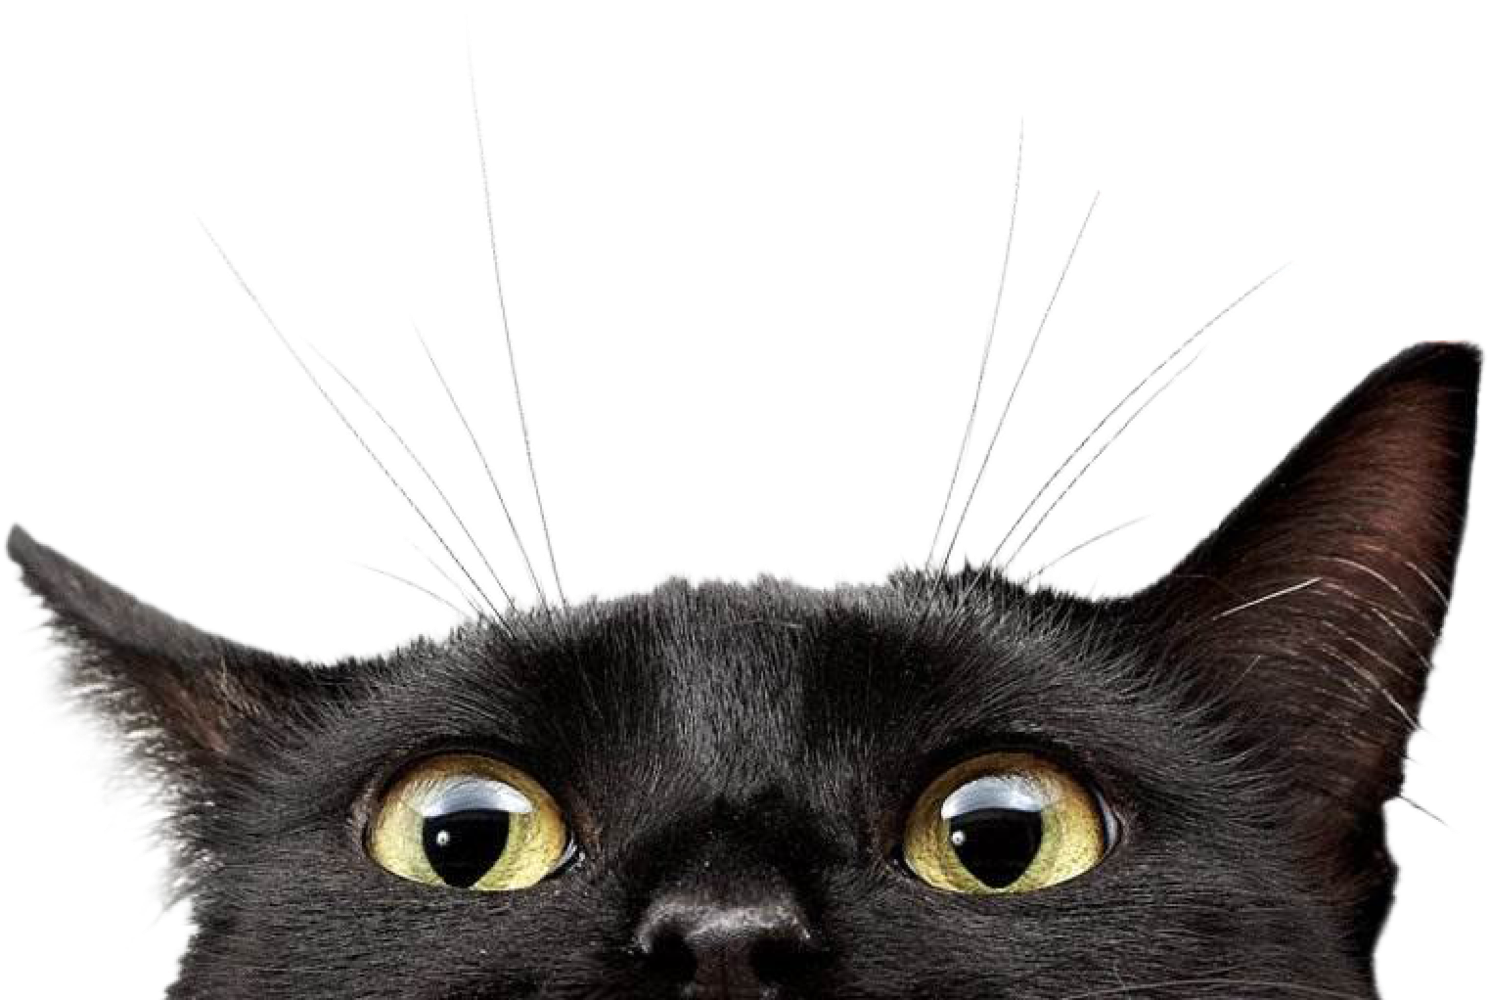

In [81]:
processor.show_n_random_cats(n=1)

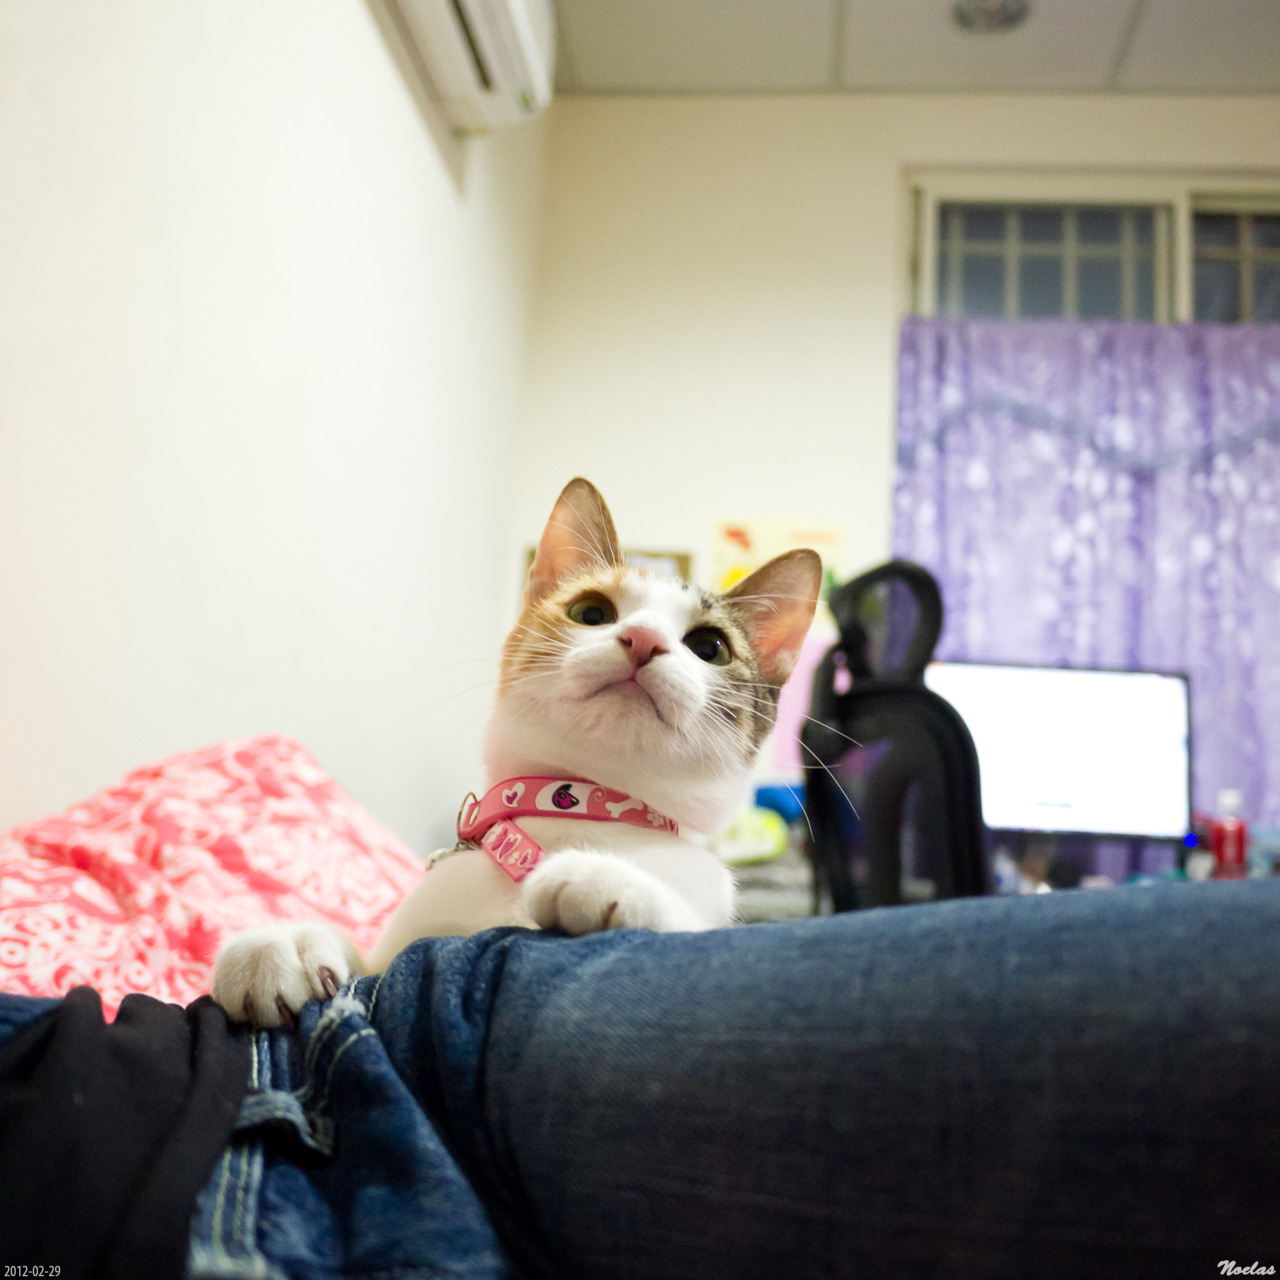

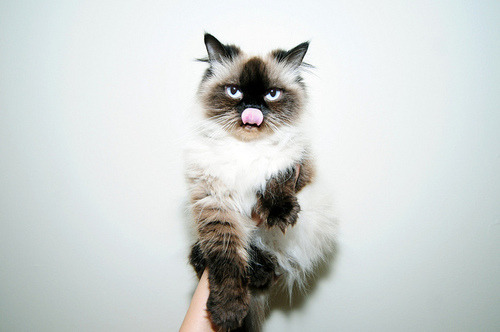

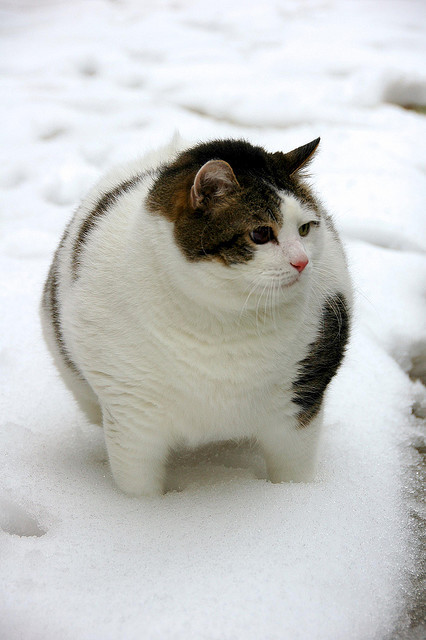

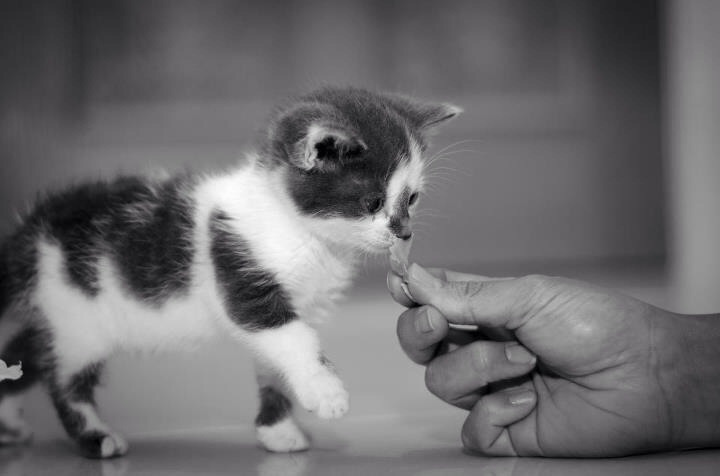

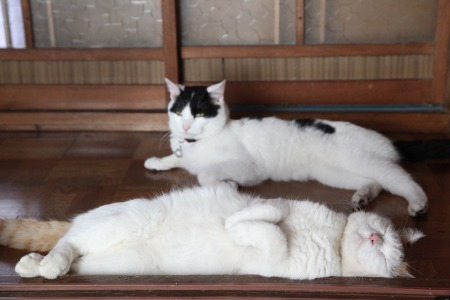

In [119]:
processor.show_n_random_cats(n=5, extension='jpg')

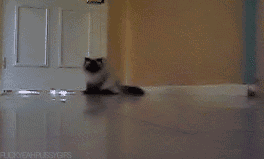

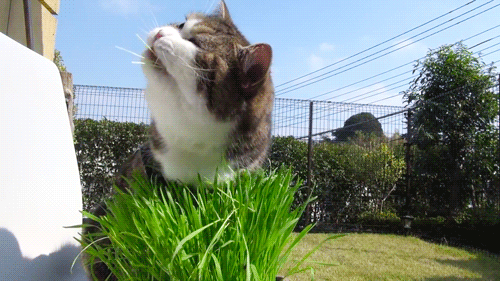

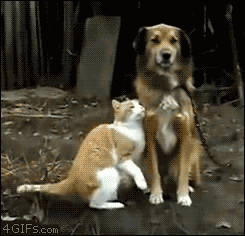

In [123]:
processor.show_n_random_cats(n=3, extension='gif')

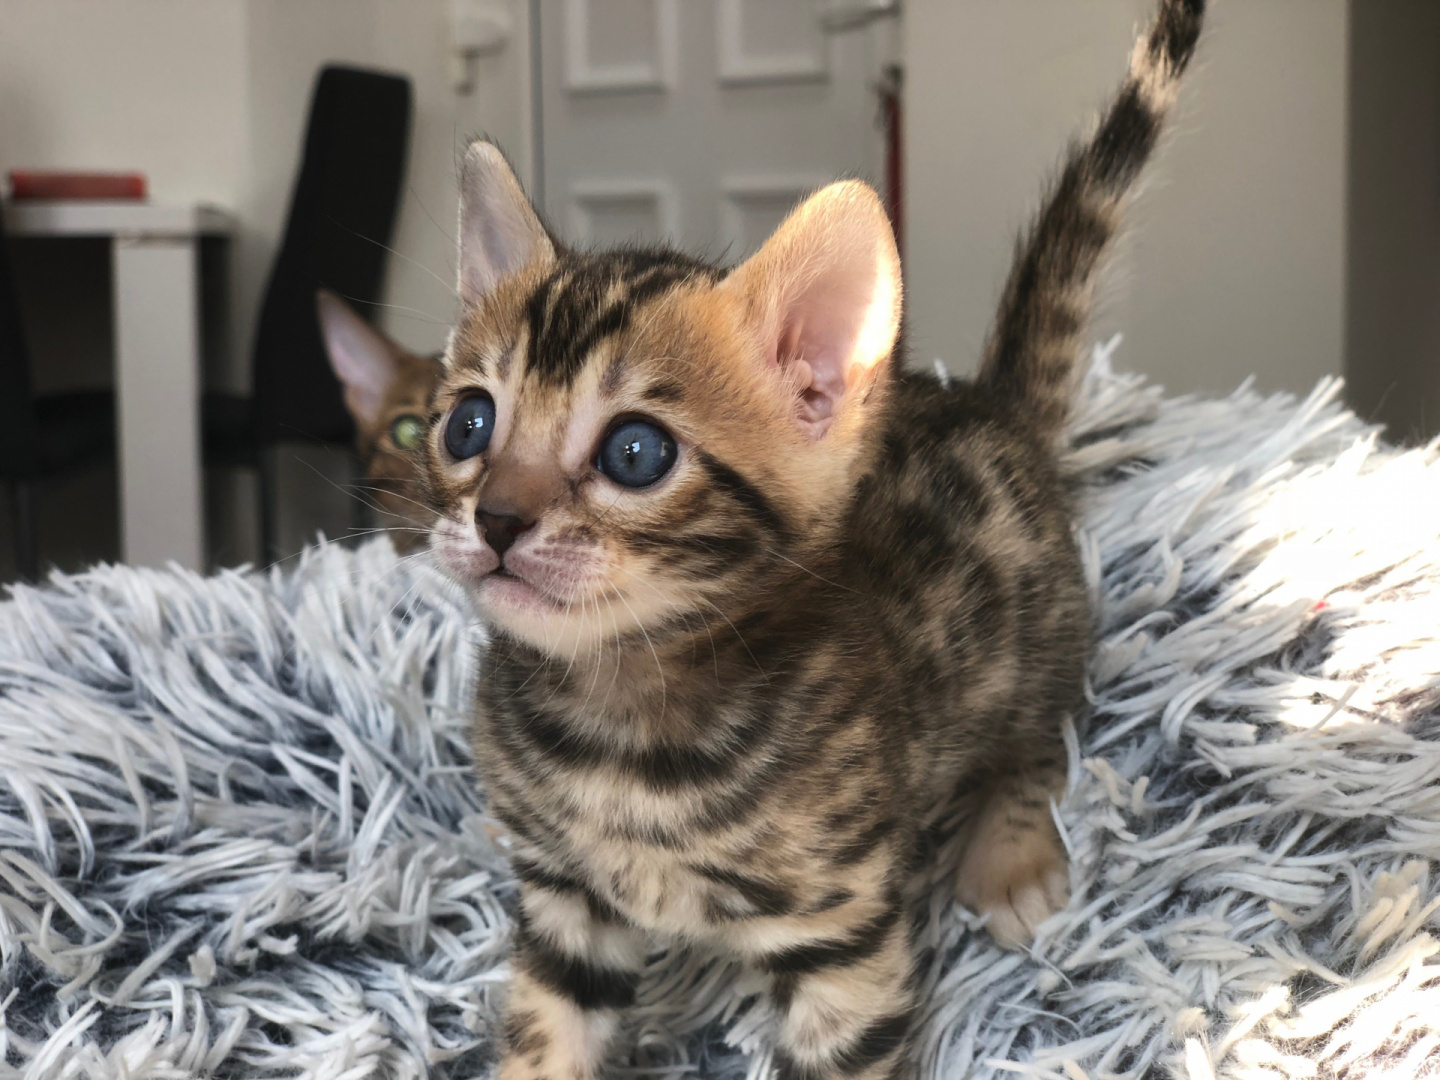

In [ ]:
processor.show_n_random_cats(n=1, breed_id="beng")

In [ ]:
id = "6k0"
processor.upvote_image(id)

Successfully upvoted image 6k0


{'message': 'SUCCESS',
 'id': 1340145,
 'image_id': '6k0',
 'value': 1,
 'country_code': 'FR'}

In [ ]:
id = 1340145
processor.remove_vote(id)

Failed to remove vote 1340145.
{"message":"SUCCESS"}


_Task failed successfully_

Je suis allé vérifié, le vote a bien été supprimé. Je ne comprends pas pourquoi le status_code renvoyé n'est pas 200.

In [183]:
processor.make_wrong_request()

Failed request: 400
<!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 400 (Bad Request)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) no-repeat 0% 0%/100% 100%;-moz-b